<a href="https://colab.research.google.com/github/kohatu12/My_project/blob/main/open_data_ggl_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка библиотек и данных.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score
from pylab import rcParams
from sklearn.linear_model import LinearRegression

Загрузка и первичная обработка данных

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GOOGLe prices.csv")
num_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(",", ".")
        df[col] = pd.to_numeric(df[col], errors="coerce")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').dropna(subset=['Date']).reset_index(drop=True)
df.dropna(subset=num_cols, how='all', inplace=True)
df['Return'] = df['Adj Close'].pct_change()
df['Direction'] = np.where(df['Return'] > 0, 1, 0)
df = df.dropna(subset=['Return']).reset_index(drop=True)

print("\nПропущенные значения в фрейме данных:")
print(df.isnull())
df.dropna(how='all', inplace=True)
print(df.dtypes)
print(df. head())


Пропущенные значения в фрейме данных:
       Date   Open   High    Low  Close  Adj Close  Volume  Return  Direction
0     False  False  False  False  False      False   False   False      False
1     False  False  False  False  False      False   False   False      False
2     False  False  False  False  False      False   False   False      False
3     False  False  False  False  False      False   False   False      False
4     False  False  False  False  False      False   False   False      False
...     ...    ...    ...    ...    ...        ...     ...     ...        ...
5112  False  False  False  False  False      False   False   False      False
5113  False  False  False  False  False      False   False   False      False
5114  False  False  False  False  False      False   False   False      False
5115  False  False  False  False  False      False   False   False      False
5116  False  False  False  False  False      False   False   False      False

[5117 rows x 9 columns]


Далее была проведена проверка строк на ячейки, где встречаются
значения 0.0. Отфильтрованный фрейм сохраняется в csv-файл, а после
проводится повторная фильтрация. По итогу строки, где встречаются значения
0.0 не были найдены.



In [ ]:
zero_cap_rows = df[~df.isin(['0.0']).any(axis=1)].index
print("Номера строк, где встречаются значения 0.0:")
print(zero_cap_rows)
df[~df.isin(['0.0']).any(axis=1)]
df.to_csv('Filtered.csv', index=False)
df_filtered = pd.read_csv('Filtered.csv', sep=",", decimal=".")
zero_cap_rows = df_filtered[~df_filtered.isin(["0.0"]).any(axis=1)].index
print("Номера строк, где встречаются значения 0.0:")
print(zero_cap_rows)

Номера строк, где встречаются значения 0.0:
RangeIndex(start=0, stop=5117, step=1)
Номера строк, где встречаются значения 0.0:
RangeIndex(start=0, stop=5117, step=1)


Вывод статистики.

In [ ]:
describe_df = df_filtered.describe()
convert_dict = { 'Date': str ,'Open' : float,'High': float ,'Low' : float, 'Close' : float,'Adj Close' : float,'Volume' : float}
df_filtered = df_filtered.astype(convert_dict)
print(df_filtered.dtypes)
print(describe_df)
print(df_filtered)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Return       float64
Direction      int64
dtype: object
              Open         High          Low        Close    Adj Close  \
count  5117.000000  5117.000000  5117.000000  5117.000000  5117.000000   
mean     47.648522    48.148670    47.158103    47.663435    47.499755   
std      45.736166    46.241173    45.270041    45.763550    45.621222   
min       2.482232     2.546046     2.475976     2.502753     2.493713   
25%      13.176426    13.309560    13.042793    13.183183    13.135565   
50%      28.004000    28.200001    27.752501    27.975000    27.873955   
75%      62.750000    63.419498    62.224499    62.907001    62.679783   
max     197.250000   201.419998   194.979996   196.660004   196.660004   

             Volume       Return    Direction  
count  5.117000e+03  5117.000000  5117.000000  
mean   1.156121e+08     0.001036  

Вывод трех графиков: обычная гистограмма (цена закрытия/дата), распределение данных при помощи линейной регрессии,

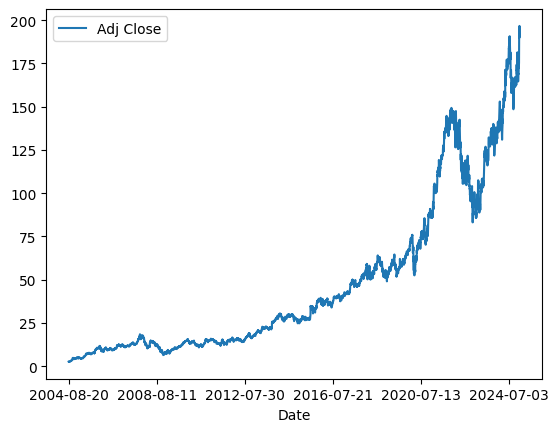

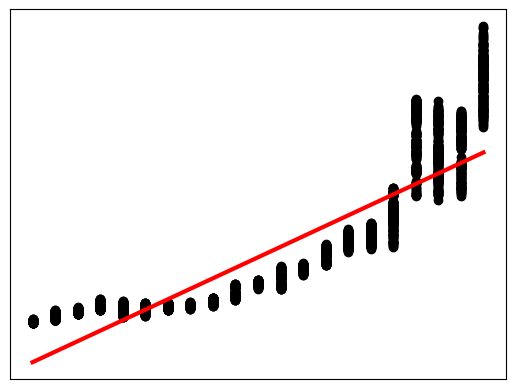

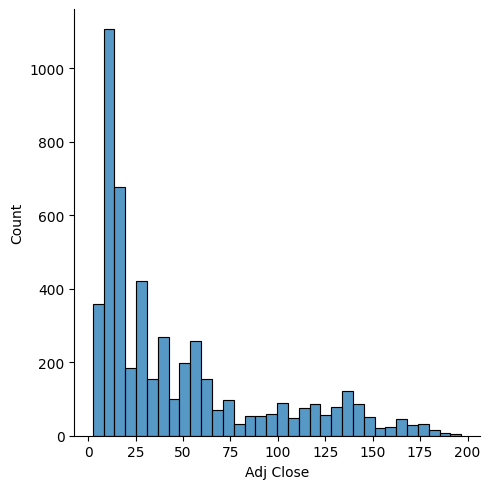

In [ ]:
#вывод первого графика
df_filtered.plot(x="Date", y="Adj Close")
plt.show()

#подготовка данных для линейной регресиии
data1 = df_filtered.iloc[:, 0]
data1 = data1.str[:4].astype(float)
data2 = df_filtered.iloc[:, 5]
data1 = data1.to_numpy().reshape(-1, 1)
data1 = np.array(data1)
data2 = np.array(data2)

#линейная регрессия
x = data1
y = data2
regr = linear_model.LinearRegression()
regr.fit(x, y)

#вывод графика распределения данных при помощи линейной регрессии
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


sns_plot = sns.displot(df_filtered['Adj Close'])
fig = sns_plot._figure
fig.savefig('facet_plot.png')
plt.show()


Корреляционный анализ

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999912  0.999903  0.999796   0.999795 -0.455786   
High       0.999912  1.000000  0.999892  0.999905   0.999904 -0.454948   
Low        0.999903  0.999892  1.000000  0.999917   0.999916 -0.456818   
Close      0.999796  0.999905  0.999917  1.000000   0.999999 -0.455995   
Adj Close  0.999795  0.999904  0.999916  0.999999   1.000000 -0.455878   
Volume    -0.455786 -0.454948 -0.456818 -0.455995  -0.455878  1.000000   
Return    -0.005264 -0.000658  0.000103  0.005057   0.005071  0.036745   
Direction  0.021858  0.025772  0.026814  0.030884   0.030891 -0.003185   

             Return  Direction  
Open      -0.005264   0.021858  
High      -0.000658   0.025772  
Low        0.000103   0.026814  
Close      0.005057   0.030884  
Adj Close  0.005071   0.030891  
Volume     0.036745  -0.003185  
Return     1.000000   0.676304  
Direction  0.676304   1.000000  


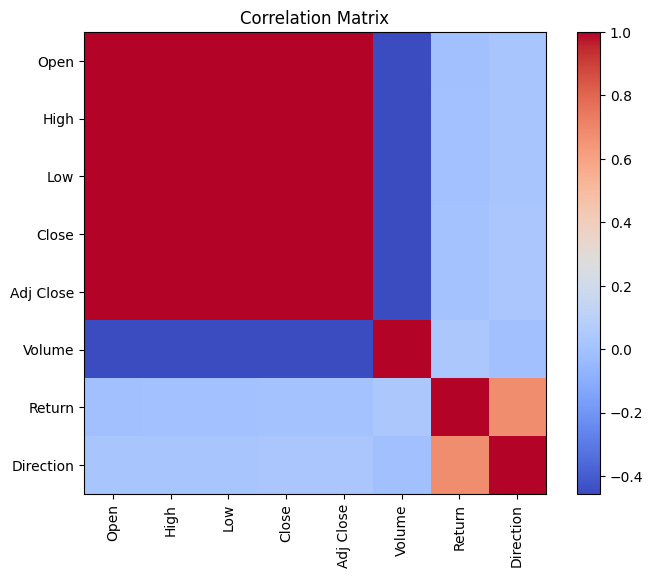

In [ ]:
numeric_df = df_filtered.select_dtypes(include=[np.number])
corr = numeric_df.corr()
print(corr)

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

Простая линейная регрессия (Adj Close ~ Year)

Coef: 6.853892912552709
Intercept: -13758.246877554413
R^2: 0.7798969871124509
MSE: 457.1579638009545


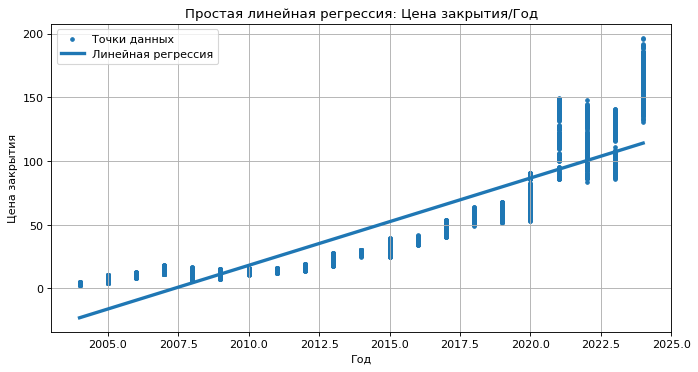

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 80

df_filtered["Year"] = df_filtered["Date"].str[:4].astype(int)

X = df_filtered[["Year"]].values
y = df_filtered["Adj Close"].values

regr = LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

print("Coef:", regr.coef_[0])
print("Intercept:", regr.intercept_)
print("R^2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, s=10, label='Точки данных')
plt.plot(X, y_pred, linewidth=3, label='Линейная регрессия')
plt.xlabel("Год")
plt.ylabel("Цена закрытия")
plt.title("Простая линейная регрессия: Цена закрытия/Год")
plt.legend()
plt.grid(True)
plt.show()

Множественная линейная регрессия

Коэффициенты множественной линейной регрессии:
Open: -0.004299679771258473
High: 0.0036478208365947618
Low: 0.005197343492187478
Close: 0.9923591100061797
Intercept: -0.015349869541537942
R^2: 0.9999987308848355
MSE: 0.002640887978396483


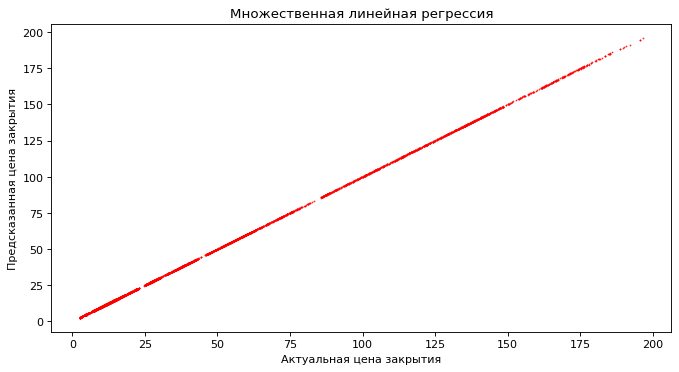

In [ ]:
features = ["Open", "High", "Low", "Close"]
X_multi = df_filtered[features].values
y = df_filtered["Adj Close"].values

regr_multi = linear_model.LinearRegression()
regr_multi.fit(X_multi, y)
y_pred_multi = regr_multi.predict(X_multi)

print("Коэффициенты множественной линейной регрессии:")
for f, c in zip(features, regr_multi.coef_):
    print(f"{f}: {c}")

print("Intercept:", regr_multi.intercept_)
print("R^2:", r2_score(y, y_pred_multi))
print("MSE:", mean_squared_error(y, y_pred_multi))

plt.scatter(y, y_pred_multi, s=0.25, c='red')
plt.xlabel("Актуальная цена закрытия")
plt.ylabel("Предсказанная цена закрытия")
plt.title("Множественная линейная регрессия")
plt.show()

Классификация (Дерево решений)

In [ ]:
df_filtered = df_filtered.sort_values("Date")
df_filtered["Adj_Close_next"] = df_filtered["Adj Close"].shift(-1)
df_filtered.dropna(subset=["Adj_Close_next"], inplace=True)

df_filtered["Up"] = (df_filtered["Adj_Close_next"] > df_filtered["Adj Close"]).astype(int)

X = df_filtered[features].values
y = df_filtered["Up"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=False
)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Точность:", accuracy_score(y_test, y_pred))
print("Вывод коассификации:\n", classification_report(y_test, y_pred))

Точность: 0.5433932759968726
Вывод коассификации:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       584
           1       0.54      1.00      0.70       695

    accuracy                           0.54      1279
   macro avg       0.27      0.50      0.35      1279
weighted avg       0.30      0.54      0.38      1279



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Классификация данных. Алгоритм KNN.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import StratifiedKFold
StratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5, random_state=0)
best_score = 0
neighbors_settings = range(1, 11)

df_knn = df.copy().reset_index(drop=True)
df_knn['AdjClose_lag1'] = df_knn['Adj Close'].shift(1)
df_knn['AdjClose_lag2'] = df_knn['Adj Close'].shift(2)
df_knn['PctChange_1'] = df_knn['Adj Close'].pct_change().shift(1)
df_knn = df_knn.dropna().reset_index(drop=True)

feat_cols = ['Open','Close','Volume','AdjClose_lag1','AdjClose_lag2','PctChange_1']
X_knn = df_knn[feat_cols].fillna(0)
y_knn = df_knn['Direction']

X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, shuffle=False)

for cv in [kfold, StratifiedKFold, shuffle_split]:
    for n_neighbors in neighbors_settings:
        #обучаем KNeighborsClassifier
        clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n_neighbors)
        # выполняем пересчёт перекрёстной проверки
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        # вычисляем среднюю правдивость перекрёстной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правдивости, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n_neighbors}
            best_cv = cv
# заново строим модель
clf = KNeighborsClassifier(**best_parameters, n_jobs=-1)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Лучшее значение правдивости на обучающем наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Лучший метод перекрёстной проверки: ", best_cv)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правдивости на обучающем наборе: 0.516
Наилучшие значения параметров:  {'n_neighbors': 3}
Лучший метод перекрёстной проверки:  StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
Правильность на тестовом наборе с наилучшими параметрами: 0.476


In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import StratifiedKFold
StratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5, random_state=0)
best_score_scaled = 0
neighbors_settings = range(1, 11)

df_knn = df.copy().reset_index(drop=True)
df_knn['AdjClose_lag1'] = df_knn['Adj Close'].shift(1)
df_knn['AdjClose_lag2'] = df_knn['Adj Close'].shift(2)
df_knn['PctChange_1'] = df_knn['Adj Close'].pct_change().shift(1)
df_knn = df_knn.dropna().reset_index(drop=True)

feat_cols = ['Open','Close','Volume','AdjClose_lag1','AdjClose_lag2','PctChange_1']
X_knn = df_knn[feat_cols].fillna(0)
y_knn = df_knn['Direction']

X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, shuffle=False)

for scaler_class in [StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler, Normalizer]:
    for cv in [kfold, StratifiedKFold, shuffle_split]:
        for n_neighbors in neighbors_settings:
            # масштабируем данные
            scaler = scaler_class().fit(X_train)
            X_train_scaled = scaler.transform(X_train)

            # обучаем KNeighborsClassifier
            clf_scaled = KNeighborsClassifier(n_jobs=-1, n_neighbors=n_neighbors)

            # выполняем перекрестную проверку
            scores = cross_val_score(clf_scaled, X_train_scaled, y_train, cv=cv, n_jobs=-1)

            # вычисляем среднюю правильность перекрестной проверки
            score = np.mean(scores)

            # если получаем лучшее значение правильности, сохраняем параметры
            if score > best_score_scaled:
                best_score_scaled = score
                best_parameters_scaled = {'n_neighbors': n_neighbors}
                best_cv = cv
                best_scaler_class = scaler_class

# заново масштабируем данные лучшим методом
scaler = best_scaler_class().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# строим модель с лучшими параметрами
clf_scaled = KNeighborsClassifier(**best_parameters_scaled, n_jobs=-1)
clf_scaled.fit(X_train_scaled, y_train)
test_score_scaled = clf_scaled.score(X_test_scaled, y_test)

print("Лучшее значение правильности на обучающем наборе: {:.3f}".format(best_score_scaled))
print("Наилучшие значения параметров: ", best_parameters_scaled)
print("Наилучший метод масштабирования: ", best_scaler_class.__name__)
print("Наилучший метод перекрестной проверки: ", best_cv)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score_scaled))

Лучшее значение правильности на обучающем наборе: 0.760
Наилучшие значения параметров:  {'n_neighbors': 1}
Наилучший метод масштабирования:  Normalizer
Наилучший метод перекрестной проверки:  StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
Правильность на тестовом наборе с наилучшими параметрами: 0.565


Кластерный анализ. Алгоритм K-Means.

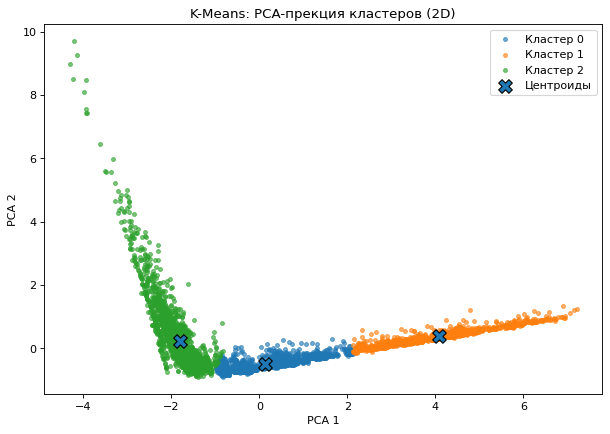

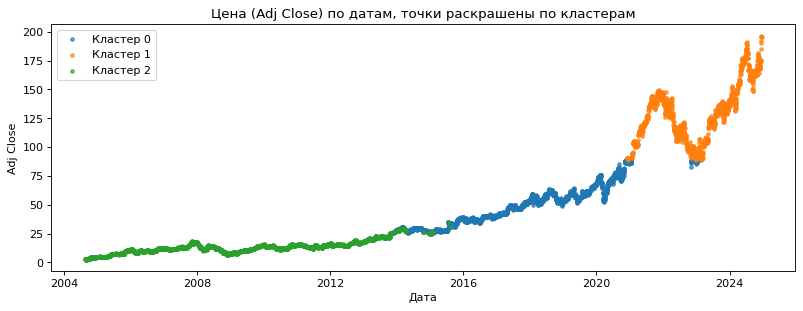

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

#K-Means + PCA визуализация
features = ["Open","High","Low","Close","Adj Close","Volume"]
X = df[features].fillna(method='ffill').fillna(method='bfill')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Кластер'] = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# PCA для 2D проекции
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(9,6))
palette = sns.color_palette("tab10", n_colors=3)
for c in np.unique(df['Кластер']):
    mask = df['Кластер']==c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=12, alpha=0.6, label=f"Кластер {c}", color=palette[c])
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='X', s=150, edgecolors='k', label='Центроиды')
plt.title("K-Means: PCA-прекция кластеров (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# Временной график цены + кластеры
plt.figure(figsize=(12,4))
for c in np.unique(df['Кластер']):
    mask = df['Кластер']==c
    plt.scatter(df['Date'].loc[mask], df['Adj Close'].loc[mask], s=10, label=f"Кластер {c}", alpha=0.7, color=palette[c])
plt.title("Цена (Adj Close) по датам, точки раскрашены по кластерам")
plt.xlabel("Дата")
plt.ylabel("Adj Close")
plt.legend()
plt.show()

Нейронные сети

MAE: 10.557662179090352
MSE: 166.72285608693443
RMSE: 166.72285608693443
R2: 0.7456792156308073


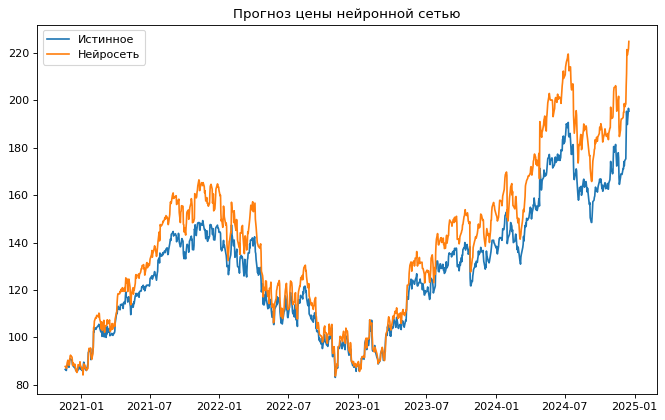

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Признаки
X = df[["Open", "High", "Low", "Close", "Volume"]].values
y = df["Adj Close"].values.reshape(-1, 1)

# Масштабируем X
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Масштабируем y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Деление на выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

# Нейронная сеть
nn = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42
)

nn.fit(X_train, y_train.ravel())

# Предсказание в scale-е
y_pred_scaled = nn.predict(X_test)

# Возвращаем реальные значения
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test)

# Метрика
print("MAE:", mean_absolute_error(y_test_real, y_pred))
mse = mean_squared_error(y_test_real, y_pred)
rmse = mean_squared_error(y_test_real, y_pred)
r2 = r2_score(y_test_real, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

# График
plt.figure(figsize=(10,6))
plt.plot(df["Date"].iloc[len(X_train):], y_test_real, label="Истинное")
plt.plot(df["Date"].iloc[len(X_train):], y_pred, label="Нейросеть")
plt.title("Прогноз цены нейронной сетью")
plt.legend()
plt.show()